In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/heuristics')
!cp /content/drive/MyDrive/heuristics/test_cases ./ -r

In [4]:
!pip install xlwt xlrd xlutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 8.6 MB/s eta 0:00:00


In [5]:
from read import *
from constructivo import constructivo
from constructivoOptimizado import constructivoOptimizado
from constructivoOptimizadoExperimental import constructivoExperimental
from iterativeAntColony import iterativeAntColony
from Grasp import grasp
from store import storeData
from graphics import *
from antColony import antColony
from noise import noise
from cotaInferior import getCotaInferior
import time
import random
from math import e
import statistics
import functools
import copy

In [13]:
instance = 1
instance = "mtVRP" + str(instance)
file =  instance + ".txt"
nodesNumber, vehicles, capacity, autonomy, deposit, nodes = getData(file)
distanceMatrix = getDistanceMatrix(nodes)
demands = getDemands(nodes)

alpha = 0.05
nsol = 30
m = 3
Q = 2
a = 4
b = 10
c = 1
p = 0.9

m2 = 6
Q2 = 1
a2 = 1
b2 = 17
p2= 0.3
niter = 8
r= 0
stdDeviation = 2


In [ ]:

cotaInferior = getCotaInferior(nodes)
routes, distances, Ctime = constructivoOptimizado(nodes, vehicles, autonomy, capacity)
initialPheromone = Q/sum(distances)
iterAntRoutes, iterAntDistances, iterAntTime = iterativeAntColony(nodes, vehicles, autonomy, capacity, m2, Q2, a2, b2, c, p2, initialPheromone, niter)
antRoutes, antDistances, antTime = antColony(nodes, vehicles, autonomy, capacity, m, Q, a, b, c, p, initialPheromone)
noiseRoutes, noiseDistances, noiseTime = noise(nodes, vehicles, autonomy, capacity, r, stdDeviation, nsol)
graspRoutes, graspDistances, graspTime = grasp(nodes, vehicles, autonomy, capacity, alpha, nsol)

#compare(iterAntRoutes, graspRoutes, nodes, sum(iterAntDistances), sum(graspDistances), "iterACO", "Grasp")
#barGraphic(["cota inferior", "constructivo", "NOISE", "GRASP", "ACO", "limited ACO"], [cotaInferior, sum(distances), sum(noiseDistances), sum(graspDistances), sum(antDistances), sum(iterAntDistances)], instance)
#barGraphic(["constructivo", "NOISE", "GRASP", "ACO", "limited ACO"], [time, noiseTime, graspTime, antTime, iterAntTime], instance)}
#testSubject = [iterAntRoutes, iterAntDistances]


In [17]:
import xlwt
import os
import xlrd
from xlutils.copy import copy as xl_copy

def storeData(routes, distances, time, autonomy, name, instance):
    wb = None
    if(os.path.isfile("mtVRP_DavidCalleGonzalez_" + name + ".xls")):
        rb = xlrd.open_workbook("mtVRP_DavidCalleGonzalez_" + name + ".xls", formatting_info=True)
        wb = xl_copy(rb)
    else:
        wb = xlwt.Workbook("mtVRP_DavidCalleGonzalez_" + name + ".xls")
    sheet = wb.add_sheet(instance)
    feasable = 0
    for i in range(len(routes)):
        distanceA = singleDistanceOrInvalid(routes[i])
        sheet.write(i, len(routes[i]), distanceA)
        localFeasable = 0 if distanceA <= autonomy else 1
        feasable = feasable or localFeasable
        sheet.write(i, len(routes[i])+1, localFeasable)
        for j in range(len(routes[i])):
            sheet.write(i, j, routes[i][j])
    sheet.write(len(routes), 0, distanceOrInvalid(routes))
    sheet.write(len(routes), 1, round(time, 3))
    sheet.write(len(routes), 2, feasable)
    wb.save("mtVRP_DavidCalleGonzalez_" + name + ".xls")

In [31]:

algorithms = [subrouteSwapperExecuter, crossTwoOptExecuter, crossSwapExecuter, threeOptExecuter, insertExecuter, twoOptExecuter, swapExecuter, crossInsertExecuter, crossTwoOptReversedExecuter]
timeLimits =  [300,300,450,600,450,300,450,450,450,450,600,300]

harderAlgorithms = [crossTwoOptExecuter, threeOptExecuter, twoOptExecuter , crossTwoOptReversedExecuter]
simplerAlgorithms = [crossSwapExecuter, crossInsertExecuter, crossTwoOptExecuter]
algorithms = [crossTwoOptExecuter, crossSwapExecuter, threeOptExecuter, insertExecuter, twoOptExecuter, swapExecuter, crossInsertExecuter, crossTwoOptReversedExecuter, subrouteSwapperExecuter]

results = []
resultsTime = []

for i in range(1, 13):
    results.append([])
    resultsTime.append([])
    instance = "mtVRP" + str(i)
    file =  instance + ".txt"
    print(file)
    nodesNumber, vehicles, capacity, autonomy, deposit, nodes = getData(file)
    distanceMatrix = getDistanceMatrix(nodes)
    demands = getDemands(nodes)
    routes, distances, constTime = constructivoOptimizado(nodes, vehicles, autonomy, capacity)
    #initialPheromone = Q/sum(distances)
    #iterAntRoutes, iterAntDistances, iterAntTime = iterativeAntColony(nodes, vehicles, autonomy, capacity, m2, Q2, a2, b2, c, p2, initialPheromone, niter)
    #antRoutes, antDistances, antTime = antColony(nodes, vehicles, autonomy, capacity, m, Q, a, b, c, p, initialPheromone)
    #noiseRoutes, noiseDistances, noiseTime = noise(nodes, vehicles, autonomy, capacity, r, stdDeviation, nsol)
    #graspRoutes, graspDistances, graspTime = grasp(nodes, vehicles, autonomy, capacity, alpha, nsol)
    """
    VNS_start = time.time()
    definitive = VNS(iterAntRoutes, algorithms, limitTime=timeLimits[i-1])
    VNS_time = time.time() - VNS_start
    """

    definite_start = time.time()
    definitive = definitiveAlgorithm(200, 30, 650, 0.1, simplerAlgorithms, algorithms, 7, timeLimits[i-1])
    definite_time = time.time() - definite_start
    """
    results[i-1].append(distanceOrInvalid(iterAntRoutes))
    results[i-1].append(distanceOrInvalid(vns_result))
    results[i-1].append(distanceOrInvalid(definitive))
    resultsTime[i-1].append(iterAntTime)
    resultsTime[i-1].append(VNS_time)
    resultsTime[i-1].append(definite_time)
    """
    print(definite_time)
    print(distanceOrInvalid(definitive))

    storeData(definitive, distanceOrInvalid(definitive), abs(definite_time), autonomy, "HybridAlgorithm", instance)
    #storeData(definitive, distanceOrInvalid(definitive), abs(VNS_time), autonomy, "VNS", instance)
    #storeData(VNSOpt_solution, distanceOrInvalid(VNSOpt_solution), abs(VNSOpt_time), autonomy, "VNSOpt", instance)
    #storeData(VNSMSRSP_solution, distanceOrInvalid(VNSMSRSP_solution), abs(VNSMSRSP_time), autonomy, "VNSMSRSP", instance)
    #storeData(noiseVns, distanceOrInvalid(noiseVns) or noiseDistances, abs(endNoise), autonomy, "NOISE", instance)
    #storeData(graspVns, distanceOrInvalid(graspVns) or graspDistances, abs(endGrasp), autonomy, "GRASP", instance)
    #storeData(constructiveVns, distanceOrInvalid(constructiveVns) or distances, abs(endConst), autonomy, "Constructivo", instance)
    #barGraphic(["cota inferior", "constructivo", "NOISE", "GRASP", "ACO", "limited ACO"], [cotaInferior, sum(distances), sum(noiseDistances), sum(graspDistances), sum(antDistances), sum(iterAntDistances)], instance)
    #barGraphic(["constructivo", "NOISE", "GRASP", "ACO", "limited ACO"], [time, noiseTime, graspTime, antTime, iterAntTime], instance)

mtVRP1.txt
10.721501588821411
553.53
mtVRP2.txt
29.208656072616577
880.45
mtVRP3.txt
22.093871355056763
877.56
mtVRP4.txt
29.22866415977478
880.77
mtVRP5.txt
102.31996536254883
867.78
mtVRP6.txt
108.75775814056396
860.92
mtVRP7.txt
472.55205249786377
1112.76
mtVRP8.txt
856.1145186424255
1468.49
mtVRP9.txt
913.4322094917297
1461.96
mtVRP10.txt
261.33970642089844
1187.09
mtVRP11.txt
71.66677236557007
826.79
mtVRP12.txt
79.32970476150513
827.82


In [ ]:
results

[1034.11, 867.32, 855.23]

In [ ]:
import copy

results2 = copy.deepcopy(results)
results3 = copy.deepcopy(results)
for i in range(len(results2)):
  try:
    instance = "mtVRP" + str(i+1)
    file =  instance + ".txt"
    print(file)
    nodesNumber, vehicles, capacity, autonomy, deposit, nodes = getData(file)
    distanceMatrix = getDistanceMatrix(nodes)
    demands = getDemands(nodes)
    results2[i] = list(map(lambda x: getRouteDistace(x), results2[i]))
  except:
    print("failed " + str(i)) 

NameError: ignored

In [ ]:
results2 = copy.deepcopy(results)
results3 = copy.deepcopy(results)

In [ ]:
results2 = [[cotasInferiores[i]] + results2[i] for i in range(len(results))]


In [ ]:
comparacionCotaInferior = [[] for i in range(len(results[0]))]
for i in range(12):
  for j in range(len(results[0])):
    comparacionCotaInferior[j].append(100 * results[i][j] / cotasInferiores[i])
comparacionCotaInferior = [statistics.mean(el) for el in comparacionCotaInferior]
comparacionCotaInferior

[227.9729758422374, 197.58804441232127, 198.85354676634805]

In [ ]:
results2

[[384.48, 648.01, 564.56, 582.67],
 [515.34, 1050.07, 919.91, 892.83],
 [515.34, 1017.78, 869.97, 873.58],
 [515.34, 1012.34, 887.84, 887.98],
 [585.74, 1031.16, 880.04, 878.03],
 [585.74, 1034.11, 867.32, 855.23],
 [596.49, 1315.43, 1108.95, 1131.59],
 [658.59, 1651.64, 1434.53, 1490.75],
 [658.59, 1653.47, 1486.35, 1493.37],
 [336.44, 1320.68, 1199.15, 1217.35],
 [395.03, 993.2, 836.9, 828.33],
 [395.03, 989.54, 824.04, 827.09]]

In [ ]:

cotasInferiores = [384.48,515.34,515.34,515.34,585.74,585.74,596.49,658.59,658.59,336.44,395.03,395.03]
labels = ["LACO", "VNS", "Hybrid"]
labelsCI = ["Cota inferior","LACO", "VNS", "Hybrid"]

In [ ]:
import matplotlib.pyplot as plt

def barGraphic(names, values, label):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    fig.suptitle(label)
    ax.bar(names, values)
    for i in range(len(names)):
        plt.text(i ,values[i], round(values[i], 2))
    plt.show()

In [ ]:
for i in range(len(resultsTime)):
  barGraphic(labels, resultsTime[i], "Tiempo de cómputo para mtvrp " + str(i + 1))

In [ ]:
for i in range(len(resultsTime)):
  barGraphic(labelsCI, results2[i], "Función objetivo para mtvrp " + str(i + 1))

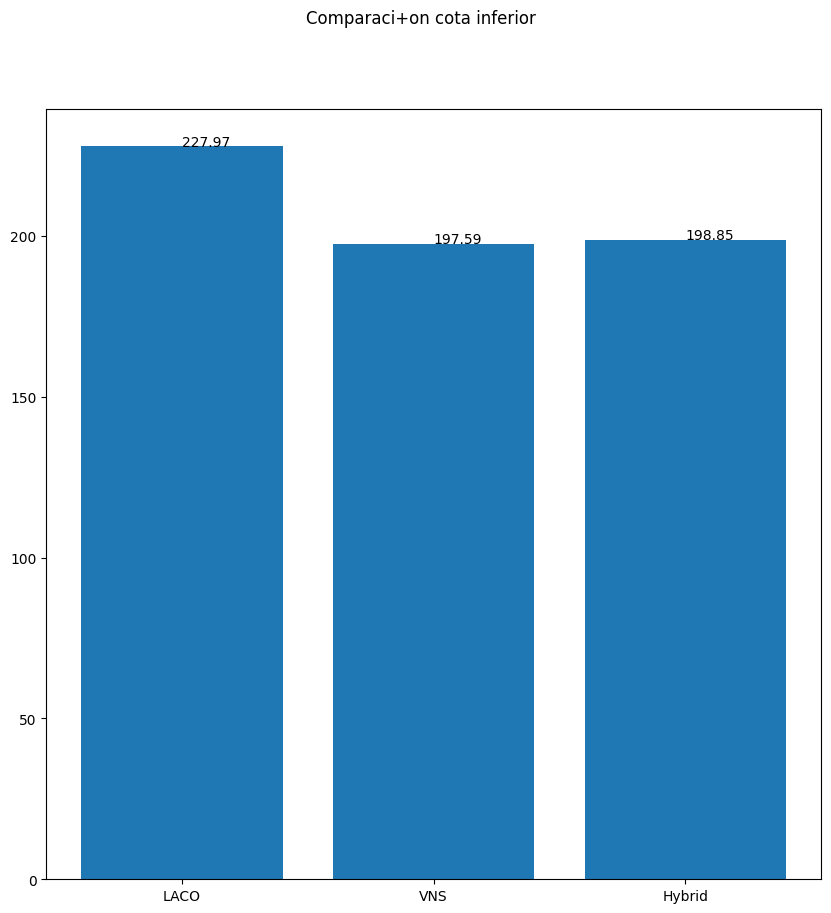

In [ ]:
barGraphic(labels, comparacionCotaInferior, "Comparaci+on cota inferior")

In [6]:
def twoOpt(route, a, b):
  return route[:a+1] + route[a+1: b+1][::-1] + route[b+1:]

def crossTwoOpt (routeFrom, routeTo, a, b):
  return [routeFrom[:a+1] + routeTo[b+1:], routeTo[:b+1] + routeFrom[a+1:]]

def crossTwoOptReversed (routeFrom, routeTo, a, b):
  return [routeFrom[:a+1] + routeTo[:b+1][::-1] , routeTo[b+1:][::-1] + routeFrom[a+1:]   ]

def threeOpt(route, a, b, c):
  r1 = route[0:a+1] + route[a+1: b+1] + route[b+1 : c+1][::-1] + route[c+1:]
  r2 = route[0:a+1] + route[a+1: b+1][::-1] + route[b+1 : c+1] + route[c+1:]
  r3 = route[0:a+1] + route[a+1: b+1][::-1] + route[b+1 : c+1][::-1] + route[c+1:]
  r4 = route[0:a+1]  + route[b+1 : c+1] + route[a+1: b+1] + route[c+1:]
  r5 = route[0:a+1]  + route[b+1 : c+1] + route[a+1: b+1][::-1] + route[c+1:]
  r6 = route[0:a+1]  + route[b+1 : c+1][::-1] + route[a+1: b+1] + route[c+1:]
  r7 = route[0:a+1]  + route[b+1 : c+1][::-1] + route[a+1: b+1][::-1] + route[c+1:]
  return r1, r2, r3, r4, r5, r6, r7

def getBestThreeOpt(route, a, b, c):
  routes = threeOpt(route, a, b, c)
  bestRoute = None
  bestDistance = 0
  for i in range(len(routes)):
    newDistance = singleDistanceOrInvalid(routes[i])
    if newDistance:
      if bestRoute == None or newDistance < bestDistance:
        bestRoute = routes[i]
        bestDistance = newDistance
  return bestRoute

def swap(route, a, b):
  route = route.copy()
  temp = route[b]
  route[b] = route[a]
  route [a] = temp
  return route

def crossSwap(routeA, routeB, a, b):
  routeA = routeA.copy()
  routeB = routeB.copy()
  temp = routeB[b]
  routeB[b] = routeA[a]
  routeA[a] = temp
  return routeA, routeB

def insert(route, node, position):
  route = route.copy()
  offset = 1 if  node > position else 0
  removedNode = route.pop(node)
  route.insert( position + offset, removedNode)
  return route

def crossInsert(routeA, routeB, node, position):
  routeA2 = routeA.copy()
  routeB2 = routeB.copy()
  removedNode = routeA2.pop(node)
  routeB2.insert(position, removedNode)
  return routeA2, routeB2

def singleDistanceOrInvalid(route):
  currentCapacity = capacity
  distance = 0
  visited = []
  if(route[0] != 0 or route[-1] != 0):
    return None
  for i in range(len(route)):
    if route[i] in visited and route[i] != 0:
      return None
    visited.append(route[i])
    currentCapacity -= demands[route[i]]
    if(i <= len(route) - 2):
      distance += distanceMatrix[route[i]][route[i+1]]
    if route[i] == 0:
      currentCapacity = capacity
    if currentCapacity < 0:
      return None
  return round(distance, 2)


def distanceOrInvalid(routes):
  distance = 0
  for route in routes:
    routeDistance = singleDistanceOrInvalid(route)
    if routeDistance:
      distance += routeDistance
    else:
      return None
  return round(distance, 2)

def singleDistance(route):
  currentCapacity = capacity
  distance = 0
  visited = []
  for i in range(len(route)):
    visited.append(route[i])
    currentCapacity -= demands[route[i]]
    if(i <= len(route) - 2):
      distance += distanceMatrix[route[i]][route[i+1]]
    if route[i] == 0:
      currentCapacity = capacity
  return round(distance, 2)


def getRouteDistace(routes):
  distance = 0
  for route in routes:
    routeDistance = singleDistance(route)
    if routeDistance:
      distance += routeDistance
  return round(distance, 2)

def getFactivilityScore(route):
  distance = singleDistanceOrInvalid(route)
  if distance == None:
    return None
  return  max(distance - autonomy, 0)

def getNetFactivilityScore(route):
  distance = singleDistanceOrInvalid(route)
  if distance == None:
    return None
  return  distance - autonomy

def feasiblenessOrInvalid(routes):
  feasibleScore = 0
  for route in routes:
    routeFeasibleness = getFactivilityScore(route)
    if routeFeasibleness != None:
      feasibleScore += routeFeasibleness
    else:
      return None
  return round(feasibleScore, 2)

def feasiblenessNetOrInvalid(routes):
  feasibleScore = 0
  for route in routes:
    routeFeasibleness = getNetFactivilityScore(route)
    if routeFeasibleness != None:
      feasibleScore += routeFeasibleness
    else:
      return None
  return round(feasibleScore, 2)


In [7]:
def twoOptExecuter(routes, bestImprovement=True, T=None, distanceOrInvalid = distanceOrInvalid):
  bestSolution = routes
  bestDistance = distanceOrInvalid(routes)
  enhanced = None
  for route in range(len(routes)):
    for nodeFrom in range(1, len(routes[route])-3):
      for nodeTo in range(nodeFrom + 2, len(routes[route])-1):
        newSolution = routes.copy()
        newSolution[route] = twoOpt(newSolution[route], nodeFrom, nodeTo)
        newDistance = distanceOrInvalid(newSolution)
        if(newDistance != None and newDistance < bestDistance):
          if(not bestImprovement):
            return newSolution    
          enhanced = True
          bestSolution = newSolution
          bestDistance = newDistance
        elif T and newDistance != None and random.random() <= e**((bestDistance - newDistance) / T):
          if(not bestImprovement):
            return newSolution  
          enhanced = True
          bestSolution = newSolution
          bestDistance = newDistance
  return(enhanced and  bestSolution)

def crossTwoOptExecuter(routes, bestImprovement=True, T=None, distanceOrInvalid = distanceOrInvalid):
  bestSolution = routes
  bestDistance = distanceOrInvalid(routes)
  enhanced = None
  for i in range(len(routes)-1):
    for j in range(i+1, len(routes)):
      for nodeFrom in range(len(routes[i])-2):
        for nodeTo in range(len(routes[j])-2):
          newSolution = routes.copy()
          newRouteI, newRouteJ = crossTwoOpt(newSolution[i], newSolution[j], nodeFrom, nodeTo)
          newSolution[i] = newRouteI
          newSolution[j] = newRouteJ
          newDistance = distanceOrInvalid(newSolution)
          if(newDistance != None and newDistance < bestDistance):
            if(not bestImprovement):
              return newSolution    
            enhanced = True
            bestSolution = newSolution
            bestDistance = newDistance
          elif T and newDistance != None and random.random() <= e**((bestDistance - newDistance) / T):
            if(not bestImprovement):
              return newSolution  
            enhanced = True
            bestSolution = newSolution
            bestDistance = newDistance
  return(enhanced and  bestSolution)

def crossTwoOptReversedExecuter(routes, bestImprovement=True, T=None, distanceOrInvalid = distanceOrInvalid):
  bestSolution = routes
  bestDistance = distanceOrInvalid(routes)
  enhanced = None
  for i in range(len(routes)-1):
    for j in range(i+1, len(routes)):
      for nodeFrom in range(len(routes[i])-2):
        for nodeTo in range(len(routes[j])-2):
          newSolution = routes.copy()
          newRouteI, newRouteJ = crossTwoOptReversed(newSolution[i], newSolution[j], nodeFrom, nodeTo)
          newSolution[i] = newRouteI
          newSolution[j] = newRouteJ
          newDistance = distanceOrInvalid(newSolution)
          if(newDistance != None and newDistance < bestDistance):
            if(not bestImprovement):
              return newSolution    
            enhanced = True
            bestSolution = newSolution
            bestDistance = newDistance
          elif T and newDistance != None and random.random() <= e**((bestDistance - newDistance) / T):
            if(not bestImprovement):
              return newSolution  
            enhanced = True
            bestSolution = newSolution
            bestDistance = newDistance
  return(enhanced and  bestSolution)


def randomCrossTwoOptExecuter(routes, T=None, Aleatory=False, limit = 100000):
  GeneratedSolution = None
  bestDistance = distanceOrInvalid(routes)
  iter = 0
  while True:
    iter += 1
    i = random.randint(0, len(routes) - 1)
    j = random.randint(0, len(routes) - 1)
    if i == j or len(routes[i]) <= 2 or len(routes[j]) <= 2: 
      continue
    if iter > limit: 
      return routes
    nodeFrom = random.randint(0, len(routes[i])-2)
    nodeTo = random.randint(0, len(routes[j])-2)
    newSolution = routes.copy()
    newRouteI, newRouteJ = crossTwoOpt(routes[i], routes[j], nodeFrom, nodeTo)
    newSolution[i] = newRouteI
    newSolution[j] = newRouteJ
    newDistance = distanceOrInvalid(newSolution)
    if newDistance != None:
      return newSolution

def swapExecuter(routes, bestImprovement=True, T=None, distanceOrInvalid = distanceOrInvalid):
  bestSolution = routes
  bestDistance = distanceOrInvalid(routes)
  enhanced = None
  for route in range(len(routes)):
    for nodeFrom in range(1, len(routes[route])-1):
      for nodeTo in range(nodeFrom + 1, len(routes[route])-1):
        newSolution = routes.copy()
        newSolution[route] = swap(newSolution[route], nodeFrom, nodeTo)
        newDistance = distanceOrInvalid(newSolution)
        if(newDistance != None and newDistance < bestDistance):
          if(not bestImprovement):
            return newSolution    
          enhanced = True
          bestSolution = newSolution
          bestDistance = newDistance
        elif T and newDistance != None and random.random() <= e**((bestDistance - newDistance) / T):
          if(not bestImprovement):
            return newSolution  
          enhanced = True
          bestSolution = newSolution
          bestDistance = newDistance
  return(enhanced and  bestSolution)

def crossSwapExecuter(routes, bestImprovement=True, T=None, distanceOrInvalid = distanceOrInvalid):
  bestSolution = routes
  bestDistance = distanceOrInvalid(routes)
  enhanced = None
  for i in range(len(routes)-1):
    for j in range(i+1, len(routes)):
      for nodeFrom in range(1, len(routes[i])-1):
        for nodeTo in range(1, len(routes[j])-1):
          newSolution = routes.copy()
          newRouteI, newRouteJ = crossSwap(newSolution[i], newSolution[j], nodeFrom, nodeTo)
          newSolution[i] = newRouteI
          singleDistanceOrInvalid(newRouteI)
          newSolution[j] = newRouteJ
          newDistance = distanceOrInvalid(newSolution)
          if(newDistance != None and newDistance < bestDistance):
            if(not bestImprovement):
              return newSolution    
            enhanced = True
            bestSolution = newSolution
            bestDistance = newDistance
          elif T and newDistance != None and random.random() <= e**((bestDistance - newDistance) / T):
            if(not bestImprovement):
              return newSolution  
            enhanced = True
            bestSolution = newSolution
            bestDistance = newDistance 
  return(enhanced and  bestSolution)

def randomCrossSwapExecuter(routes, T=None):
  GeneratedSolution = None
  bestDistance = distanceOrInvalid(routes)
  while True:
    i = random.randint(1, len(routes) - 1)
    j = random.randint(1, len(routes) - 1)
    nodeFrom = random.randint(0, len(routes[i])-2)
    nodeTo = random.randint(0, len(routes[j])-2)
    newSolution = routes.copy()
    newRouteI, newRouteJ = crossSwap(newSolution[i], newSolution[j], nodeFrom, nodeTo)
    newSolution[i] = newRouteI
    newSolution[j] = newRouteJ
    newDistance = distanceOrInvalid(newSolution)
    if(newDistance != None and newDistance < bestDistance):
      return newSolution
    elif T and newDistance != None and random.random() <= e**((bestDistance - newDistance) / T):
      return newSolution

def insertExecuter(routes, bestImprovement=True, T=None, distanceOrInvalid = distanceOrInvalid):
  bestSolution = routes
  bestDistance = distanceOrInvalid(routes)
  enhanced = None
  for route in range(len(routes)):
    for nodeFrom in range(1, len(routes[route])-1):
      for nodeTo in range(1, len(routes[route])-1):
        if(nodeFrom != nodeTo):
          newSolution = routes.copy()
          newSolution[route] = insert(newSolution[route], nodeFrom, nodeTo)
          newDistance = distanceOrInvalid(newSolution)
          if(newDistance != None and newDistance < bestDistance):
            if(not bestImprovement):
              return newSolution    
            enhanced = True
            bestSolution = newSolution
            bestDistance = newDistance
          elif T and newDistance != None and random.random() <= e**((bestDistance - newDistance) / T):
            if(not bestImprovement):
              return newSolution  
            enhanced = True
            bestSolution = newSolution
            bestDistance = newDistance
  return(enhanced and bestSolution)

def crossInsertExecuter(routes, bestImprovement=True, T=None, distanceOrInvalid = distanceOrInvalid):
  bestSolution = routes
  bestDistance = distanceOrInvalid(routes)
  enhanced = None
  for i in range(len(routes)-1):
    for j in range(1, len(routes)):
      if(i != j):
        for nodeFrom in range(1, len(routes[i])-1):
          for nodeTo in range(1, len(routes[j])-1):
            newSolution = routes.copy()
            newRouteI, newRouteJ = crossInsert(newSolution[i], newSolution[j], nodeFrom, nodeTo)
            newSolution[i] = newRouteI
            newSolution[j] = newRouteJ
            newDistance = distanceOrInvalid(newSolution)
            if(newDistance != None and newDistance < bestDistance):
              if(not bestImprovement):
                return newSolution    
              enhanced = True
              bestSolution = newSolution
              bestDistance = newDistance
            elif T and newDistance != None and random.random() <= e**((bestDistance - newDistance) / T):
              if(not bestImprovement):
                return newSolution  
              enhanced = True
              bestSolution = newSolution
              bestDistance = newDistance 
  return(enhanced and  bestSolution)

def randomCrossInsertExecuter(routes, T=None, limit = 100000):
  GeneratedSolution = None
  bestDistance = distanceOrInvalid(routes)
  iter = 0
  while True:
    iter+= 1
    if(iter >= limit):
      return routes
    i = random.randint(1, len(routes) - 1)
    j = random.randint(1, len(routes) - 1)
    if i == j:
      ConnectionRefusedError
    nodeFrom = random.randint(0, len(routes[i])-2)
    nodeTo = random.randint(0, len(routes[j])-2)
    newSolution = routes.copy()
    newRouteI, newRouteJ = crossInsert(newSolution[i], newSolution[j], nodeFrom, nodeTo)
    newSolution[i] = newRouteI
    newSolution[j] = newRouteJ
    newDistance = distanceOrInvalid(newSolution)
    for route in  newSolution:
      if len(route) < 3:
        newDistance = None
    if(newDistance != None):
      return newSolution


def threeOptExecuter(routes, bestImprovement=True, T=None, distanceOrInvalid = distanceOrInvalid):
  bestSolution = routes
  bestDistance = distanceOrInvalid(routes)
  enhanced = None
  for route in range(len(routes)):
    for nodeFrom in range(1, len(routes[route])-5):
      for nodeMiddle in range(nodeFrom + 2, len(routes[route])-3):
        for nodeTo in range(nodeMiddle + 2, len(routes[route])-1):
          newSolution = routes.copy()
          newRoute = getBestThreeOpt(newSolution[route], nodeFrom, nodeMiddle, nodeTo)
          if newRoute != None:
            newSolution[route] = newRoute
            newDistance = distanceOrInvalid(newSolution)
            if(newDistance != None and newDistance < bestDistance):
              if(not bestImprovement):
                return newSolution    
              enhanced = True
              bestSolution = newSolution
              bestDistance = newDistance
            elif T and newDistance != None and random.random() <= e**((bestDistance - newDistance) / T):
              if(not bestImprovement):
                return newSolution  
              enhanced = True
              bestSolution = newSolution
              bestDistance = newDistance
  return(enhanced and  bestSolution) 

In [8]:
def subRouteSplitter(route):
  if(len(route) <= 1):
    return []
  subroutes = []
  currentSubroute = []
  for i in range(1, len(route)):
    if route[i] == 0:
      subroutes.append(currentSubroute)
      currentSubroute = []
    else:
      currentSubroute.append(route[i])
  return subroutes

def restoreRoute(subroutes):
  route = [0]
  for subroute in subroutes:
    route += subroute + [0]
  return route



def subrouteSwapper(subroutesA, subroutesB, a):
  subroutesA = subroutesA.copy()
  subroutesB = subroutesB.copy()
  subroutesB.append(subroutesA.pop(a))
  return subroutesA, subroutesB

def subrouteSwapperExecuter(routes, bestImprovement=True, T=None, distanceOrInvalid=None):
  bestSolution = routes
  bestDistance = feasiblenessOrInvalid(routes)
  enhanced = None
  for i in range(len(routes)-1):
    subRoutesA = subRouteSplitter(routes[i])
    for j in range(i, len(routes)):
      if(i != j):
        subRoutesB = subRouteSplitter(routes[j])
        for subrouteIndexA in range(1 , len(subRoutesA)):
          newSolution = routes.copy()
          newSubroutesI, newSubroutesJ = subrouteSwapper(subRoutesA, subRoutesB, subrouteIndexA)
          newSolution[i] = restoreRoute(newSubroutesI)
          newSolution[j] = restoreRoute(newSubroutesJ)
          newDistance = feasiblenessOrInvalid(newSolution)
          if(newDistance != None and newDistance < bestDistance):
            if(not bestImprovement):
              return newSolution    
            enhanced = True
            bestSolution = newSolution
            bestDistance = newDistance
          elif T and newDistance != None and random.random() <= e**((bestDistance - newDistance) / T):
            if(not bestImprovement):
              return newSolution  
            enhanced = True
            bestSolution = newSolution
            bestDistance = newDistance 
  return(enhanced and  bestSolution)


In [9]:
#algorithms = [crossTwoOptExecuter, crossSwapExecuter, threeOptExecuter, insertExecuter, twoOptExecuter, swapExecuter, crossInsertExecuter, subrouteSwapperExecuter]

def VNS(routes, algorithmExecuters, bestImprovement = True, T = None, niter = None, distanceOrInvalid=distanceOrInvalid, limitTime = None):
  bestSolution = routes
  start = time.time()
  algorithm = 0
  iter = 0
  while algorithm < len(algorithmExecuters):
    if niter and iter == niter:
      break
    newSolution = algorithmExecuters[algorithm](bestSolution, bestImprovement, T, distanceOrInvalid=distanceOrInvalid)
    if newSolution != None:
      bestSolution = newSolution
      algorithm = 0
    else:
      algorithm += 1
    iter+=1
    if(limitTime != None and time.time() - start > limitTime):
      return bestSolution
  return bestSolution

def RVNS(routes, algorithmExecuters, bestImprovement = True, T = None, distanceMethods=[distanceOrInvalid], limitTime = None, kiter = 2):
  bestSolution = routes
  iter = 0
  algorithm = None
  while len(algorithmExecuters) > 0:
    method = random.choice(distanceMethods)
    newAlgorithm = random.randint(0,  len(algorithmExecuters) -1)
    if algorithm != None:
      while(newAlgorithm == algorithm and  len(algorithmExecuters)  > 1):
        newAlgorithm = random.randint(0,  len(algorithmExecuters) -1)
    algorithm = newAlgorithm

    newSolution = algorithmExecuters[algorithm](bestSolution, bestImprovement, T, distanceOrInvalid=method)
    if(newSolution != None ):
      newDistance = distanceOrInvalid(newSolution)
      if newDistance != None and  newDistance  < distanceOrInvalid(bestSolution):
        bestSolution = newSolution
    else:
      iter += 1
    if(limitTime != None and time.time() - start > limitTime):
      return bestSolution
    if iter == kiter:
      return bestSolution
  return bestSolution

def RVNS2(routes, algorithmExecuters, bestImprovement = True, T = None, distanceMethods=[distanceOrInvalid], limitTime = None):
  bestSolution = routes
  algorithm = None
  while len(algorithmExecuters) > 0:
    method = random.choice(distanceMethods)
    newAlgorithm = random.randint(0,  len(algorithmExecuters) -1)
    if algorithm != None:
      while(newAlgorithm == algorithm and  len(algorithmExecuters)  > 1):
        newAlgorithm = random.randint(0,  len(algorithmExecuters) -1)
    algorithm = newAlgorithm

    newSolution = algorithmExecuters[algorithm](bestSolution, bestImprovement, T, distanceOrInvalid=method)

    if(newSolution != None and distanceOrInvalid(newSolution) < distanceOrInvalid(bestSolution)):
      bestSolution = newSolution
    else:
      algorithmExecuters.pop(algorithm)
    if(limitTime != None and time.time() - start > limitTime):
      return bestSolution
  return bestSolution

def Perturb(solution):
  solution = copy.deepcopy(solution)
  for i in range(5):
    solution = randomCrossTwoOptExecuter(solution)
    solution = randomCrossInsertExecuter(solution)
  return solution

def hybridRNVS(routes, algorithmExecuters, niter = 1, bestImprovement = True, T = None,  distanceMethods=[distanceOrInvalid], limitTime = None):
   bestSolution = routes
   baseSolution = copy.deepcopy(bestSolution)
   bestDistance = distanceOrInvalid(bestSolution)
   for i in range(niter):
      newSolution = RVNS(baseSolution, algorithmExecuters, kiter=2, distanceMethods=distanceMethods)
      if newSolution != None:
        newDistance = distanceOrInvalid(newSolution)
        if newDistance != None:
          if newDistance < bestDistance:
            bestSolution = newSolution
            bestDistance = newDistance
      baseSolution = Perturb(newSolution)
   return bestSolution

def hybridRNVS2(routes, algorithmExecuters, niter = 1, bestImprovement = True, T = None, distanceOrInvalid=distanceOrInvalid, limitTime = None):
   bestSolution = routes
   baseSolution = copy.deepcopy(bestSolution)
   bestDistance = distanceOrInvalid(bestSolution)
   for i in range(niter):
      newSolution = RVNS2(baseSolution, algorithmExecuters)
      if newSolution != None:
        newDistance = distanceOrInvalid(newSolution)
        if newDistance != None:
          if newDistance < bestDistance:
            bestSolution = newSolution
            bestDistance = newDistance
      baseSolution = Perturb(newSolution)
   return bestSolution
      




In [ ]:
executors = [crossTwoOptExecuter, crossSwapExecuter, threeOptExecuter, insertExecuter, twoOptExecuter, swapExecuter, crossInsertExecuter, subrouteSwapperExecuter]
results = [distanceOrInvalid(iterAntRoutes)]
for executor in executors:
  algorithms = [executor]
  sol = VNS(iterAntRoutes, algorithms)
  results.append(distanceOrInvalid(sol))
print(results)


[669.4, 628.67, 645.92, 601.11, 601.11, 601.11, 615.35, 667.3, 669.4]


In [ ]:
import matplotlib.pyplot as plt

def barGraphic(names, values, label):
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    fig.suptitle(label)
    ax.bar(names, values)
    for i in range(len(names)):
        plt.text(i ,values[i], round(values[i], 2))
    plt.show()

In [ ]:
labels= ["LACO", "CrossTwoOpt", "crossSwap", "ThreeOpt", "Insert", "TwoOpt", "Swap", "CrossInsert", "subrpouteSwapper"]
barGraphic(labels, results, instance)

In [ ]:
#LACO 558
algorithms = [subrouteSwapperExecuter, crossTwoOptExecuter, crossSwapExecuter, threeOptExecuter, insertExecuter, twoOptExecuter, swapExecuter, crossInsertExecuter, crossTwoOptReversedExecuter]

#localSearched = VNS(iterAntRoutes, algorithms, distanceOrInvalid=feasiblenessOrInvalid)
#localSearched = VNS(localSearched, algorithms, distanceOrInvalid=feasiblenessNetOrInvalid)
vnsStart = time.time()
localSearched = VNS(iterAntRoutes, algorithms)
randomlocalSearched = RVNS(iterAntRoutes, algorithms, kiter = 3)
print(time.time() - vnsStart)
print(distanceOrInvalid(localSearched))
print(distanceOrInvalid(randomlocalSearched))
#compare(antRoutes, localSearched, nodes, distanceOrInvalid(antRoutes), distanceOrInvalid(localSearched), "antRoutes", "Local search LACO")

12.520238399505615
878.78
938.53


In [10]:
import time
import random
def VNSMSRSP(Ti, Tf, L, r, nsol, limitTime = None):
  index = 0
  absoluteBestSolution = None
  adbsoluteBestDistance = None
  start = time.time()
  for i in range(nsol):
    routes = grasp(nodes, vehicles, autonomy, capacity, 0.07, 1)[0]
    while(distanceOrInvalid(routes) == None):
      routes = grasp(nodes, vehicles, autonomy, capacity, 0.07, 10)[0]
    T = Ti
    index+=1
    iter = 0
    comparativeSolution = routes.copy()
    comparativeDistance = distanceOrInvalid(routes)
    bestSolution = routes.copy()
    bestDistance = distanceOrInvalid(routes)
    perturbedSolution = randomCrossTwoOptExecuter(comparativeSolution)
    while(distanceOrInvalid(perturbedSolution) == None):
      perturbedSolution = randomCrossTwoOptExecuter(comparativeSolution)
    comparativeSolution = perturbedSolution
    comparativeDistance = distanceOrInvalid(perturbedSolution)
    newSolution = comparativeSolution
    while T > Tf:
      if iter == L:
        perturbedSolution = randomCrossTwoOptExecuter(comparativeSolution)
        while(distanceOrInvalid(perturbedSolution) == None):
          perturbedSolution = randomCrossTwoOptExecuter(comparativeSolution)
        comparativeSolution = perturbedSolution
        comparativeDistance = distanceOrInvalid(perturbedSolution)
        iter = 0
        T = T*r
      iter += 1
      if(limitTime != None and time.time() - start > limitTime):
        return absoluteBestSolution if absoluteBestSolution != None else bestSolution 
      
      tempSolution = crossInsertExecuter(newSolution, T = T, bestImprovement=False)
      if tempSolution != None:
        newSolution = tempSolution
      tempSolution = insertExecuter(newSolution, T = T, bestImprovement=False)
      if tempSolution != None:
        newSolution = tempSolution
      newSolutionDistance = distanceOrInvalid(newSolution)
      if newSolutionDistance == None or newSolutionDistance == comparativeDistance:
        continue
      comparativeSolution = newSolution
      comparativeDistance =  newSolutionDistance
      if(newSolutionDistance < bestDistance):
          bestSolution = newSolution
          bestDistance = newSolutionDistance
      
    if (absoluteBestSolution == None) or (bestDistance < adbsoluteBestDistance):
      absoluteBestSolution = bestSolution
      adbsoluteBestDistance = bestDistance
  return absoluteBestSolution


In [ ]:
#LACO 558
start = time.time()
localSearched = VNSMSRSP(1024, 0.01, 50, 0.5, 8, limitTime= 60)
print(time.time() - start)
print(distanceOrInvalid(localSearched))
print(distanceOrInvalid(iterAntRoutes))

60.01230239868164
1161.89
1016.72


In [ ]:
VNSMSRSP_results = []
VNSMSRSP_times = []
indexes = []
for i in range(1, 10):
  indexes.append(i)
  VNSMSRSP_results.append([])
  VNSMSRSP_times.append([])
  print(i)
  for j in range(1):
    start = time.time()
    localSearched = VNSMSRSP(1024, 0.01, 25, 0.5,i)
    end = time.time() - start
    VNSMSRSP_results[i-1].append(distanceOrInvalid(localSearched))
    VNSMSRSP_times[i-1].append(end)


In [25]:
from numpy import nbytes
def generalize(solution):
  return [node for node in functools.reduce(lambda x, y: x+y, solution) if node != 0]

def rebuild(route):
  currentCapacity = capacity
  solution = []
  newRoute = [0]
  currentVehicle = 0
  for i in range(vehicles):
    solution.append([])
  for i in range(len(route)):
    if currentCapacity < demands[route[i]]:
      solution[currentVehicle] += newRoute
      newRoute = [0]
      
      currentCapacity = capacity
      currentVehicle += 1
    newRoute.append(route[i])
    currentCapacity -= demands[route[i]]

    if(currentVehicle >= vehicles):
      currentVehicle = 0
    if i == len(route) -1:
      solution[currentVehicle] += newRoute
  for vehicleRoute in solution:
    vehicleRoute.append(0)
  return solution

def normalize(solution):
  return rebuild(generalize(solution))

def nDistanceOrInvalid(solution):
  return distanceOrInvalid(normalize(solution))

def nfeasiblenessOrInvalid(solution):
  return feasiblenessOrInvalid(normalize(solution))

def twoOptMutation(solution):
  indexFrom = random.randint(1, len(solution)-4)
  indexTo = random.randint(indexFrom+3, len(solution)-1)
  return twoOpt(solution, indexFrom, indexTo)

def insertMutation(solution):
  indexFrom = random.randint(1, len(solution)-1)
  indexTo = random.randint(1, len(solution)-1)
  while indexTo == indexFrom:
    indexTo = random.randint(1, len(solution)-1)
  return insert(solution, indexFrom, indexTo)

def balancedDistance(solution):
  if solution == None:
    return None
  objF = distanceOrInvalid(solution)
  feas = feasiblenessOrInvalid(solution)
  if(objF != None and feas != None):
    return objF + feas
  else:
    return None
def swapMutation(solution):
  pass

def swapMutation(solution):
  pass

def crossGenes(solutionA, solutionB):
  nodesToChange = random.randint(2,5)
  index = random.randint(0, len(solutionA) - nodesToChange)
  extractedNodes = solutionA[index: index + nodesToChange]
  child = solutionB.copy()
  for node in extractedNodes:
    child.remove(node)
  random.shuffle(extractedNodes)
  child += extractedNodes
  return child

def crossInsertGenes(solutionA, solutionB):
  nodesToChange = random.randint(2,5)
  index = random.randint(0, len(solutionA) - nodesToChange)
  indexTo = random.randint(0, len(solutionA) - 1)
  extractedNodes = solutionA[index: index + nodesToChange]
  child = solutionB.copy()
  for node in extractedNodes:
    child.remove(node)
  random.shuffle(extractedNodes)
  for node in extractedNodes[::-1]:
    child.insert(indexTo, node)
  return child


def mutate(solution):
  solution = twoOptMutation(solution)
  solution = insertMutation(solution)
  return solution

def geneticAlgorithm(nsolx16, niter, nc, mutationRate, selectionRegulator = 1):
  algorithms = [crossSwapExecuter, insertExecuter, twoOptExecuter, swapExecuter, crossInsertExecuter]
  population = []
  bestSolution = []
  bestDistance = None
  for i in range(nsolx16):
    graspSolution = grasp(nodes, vehicles, autonomy, capacity, 0.08, 1)[0]
    population.append(generalize(graspSolution))
    
  start = time.time()
  for i in range(niter):
    children = []
    for j in range(nc):
      solutionA = random.choice(population)
      solutionB = random.choice(population)
      newChild = crossInsertGenes(solutionA, solutionB)
      if random.random() < 0.1:
        newChild = mutate(newChild)
      children.append(newChild)
    population += children
    for solution in population:
      rebuiltSolution = rebuild(solution)
      solutionDistance = distanceOrInvalid(rebuiltSolution)
      if bestDistance == None or solutionDistance < bestDistance:
        bestSolution = rebuiltSolution
        bestDistance = solutionDistance
      else:
        percentualDiference = (solutionDistance / bestDistance - 1) * selectionRegulator
        if random.random() < percentualDiference:
          population.remove(solution)
  return bestSolution


def definitiveAlgorithm(kinitial, geneticIterations, geneticChildren, mutationRate, randomSearchAlgorithms, deepSearchAlgorithms, randomIterations, limitTime = None):
  bestGenetic = geneticAlgorithm(kinitial, geneticIterations, geneticChildren, mutationRate)
  geneticR = hybridRNVS(bestGenetic, randomSearchAlgorithms, niter = randomIterations)
  geneticFinal = VNS(geneticR, deepSearchAlgorithms, limitTime=limitTime)
  #geneticFinalOpt = hybridRNVS(geneticFinal, randomSearchAlgorithms, niter = randomIterations , distanceMethods=[feasiblenessNetOrInvalid, balancedDistance])
  return geneticFinal



In [ ]:
instance = 1
instance = "mtVRP" + str(instance)
file =  instance + ".txt"
nodesNumber, vehicles, capacity, autonomy, deposit, nodes = getData(file)
distanceMatrix = getDistanceMatrix(nodes)
demands = getDemands(nodes)

alpha = 0.05
nsol = 30
m = 3
Q = 2
a = 4
b = 10
c = 1
p = 0.9

m2 = 6
Q2 = 1
a2 = 1
b2 = 17
p2= 0.3
niter = 8
r= 0
stdDeviation = 2


cotaInferior = getCotaInferior(nodes)
routes, distances, Ctime = constructivoOptimizado(nodes, vehicles, autonomy, capacity)
initialPheromone = Q/sum(distances)
iterAntRoutes, iterAntDistances, iterAntTime = iterativeAntColony(nodes, vehicles, autonomy, capacity, m2, Q2, a2, b2, c, p2, initialPheromone, niter)
antRoutes, antDistances, antTime = antColony(nodes, vehicles, autonomy, capacity, m, Q, a, b, c, p, initialPheromone)
noiseRoutes, noiseDistances, noiseTime = noise(nodes, vehicles, autonomy, capacity, r, stdDeviation, nsol)
graspRoutes, graspDistances, graspTime = grasp(nodes, vehicles, autonomy, capacity, alpha, nsol)

In [ ]:


harderAlgorithms = [crossTwoOptExecuter, threeOptExecuter, twoOptExecuter , crossTwoOptReversedExecuter]
simplerAlgorithms = [crossSwapExecuter, crossInsertExecuter, crossTwoOptExecuter]
algorithms = [crossTwoOptExecuter, crossSwapExecuter, threeOptExecuter, insertExecuter, twoOptExecuter, swapExecuter, crossInsertExecuter, crossTwoOptReversedExecuter, subrouteSwapperExecuter]
solutionsTest = []
results = []
times = []
indexes = []
for i in range(1):
  print(i)
  tempResults = []
  temptimes = []
  indexes.append(i)
  for _ in range(1):
    start = time.time()
    definitive = definitiveAlgorithm(200, 30, 650, 0.1, simplerAlgorithms, algorithms, 50)
    solutionsTest.append(definitive)
    tempResults.append(distanceOrInvalid(definitive))
    temptimes.append(time.time() - start)
  results.append(statistics.mean(tempResults))
  times.append(statistics.mean(temptimes))
  print(results)
  print(times)

0
[563.66]
[9.069641351699829]


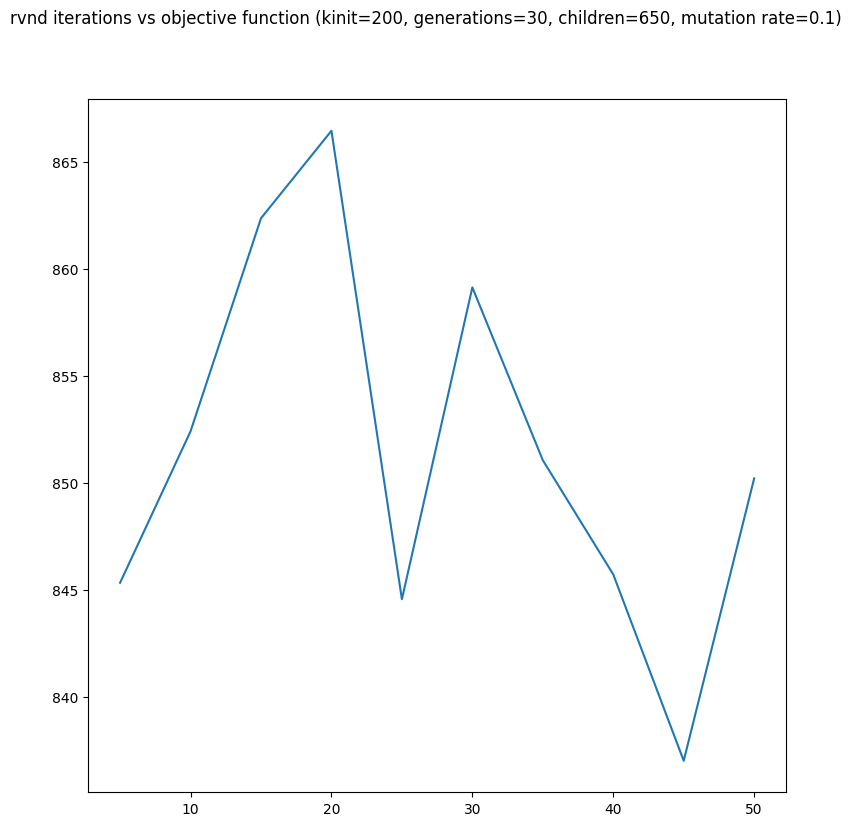

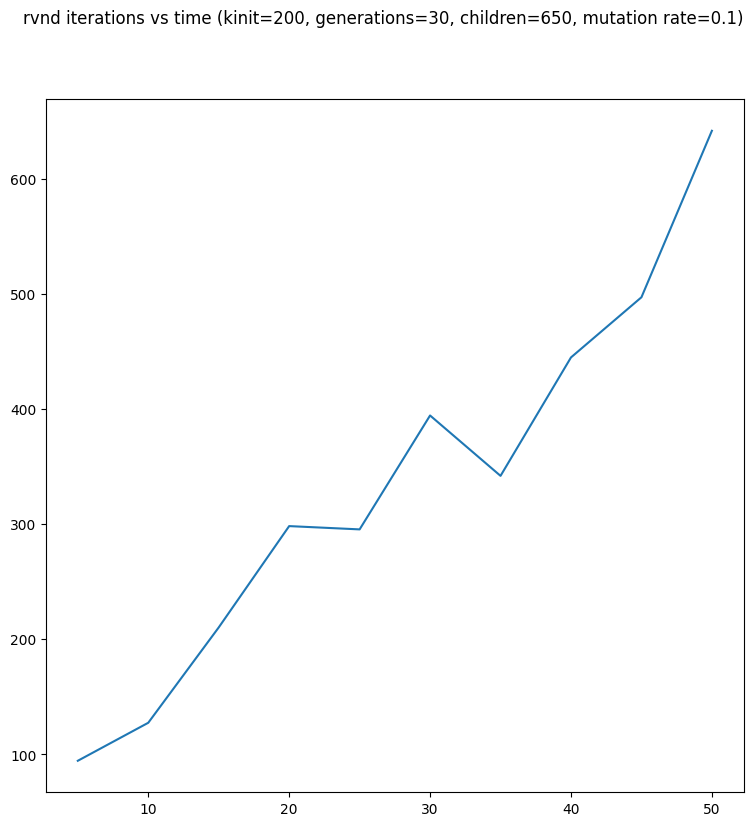

In [ ]:
plotGraphic(indexes, results, "rvnd iterations vs objective function (kinit=200, generations=30, children=650, mutation rate=0.1)")
plotGraphic(indexes, times, "rvnd iterations vs time (kinit=200, generations=30, children=650, mutation rate=0.1)")
